# Big Mart Sales Predition

 - [source](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/)

##  Stages

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation
- understand the problem and making some hypothesis about what could potentionallyhave a good impact on the outcome
- done **before** lookin at the data

### Problem statement

```
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in 
increasing sales.
```

The idea is to find out the properties of a product, and sotre which impacts the sales of a product.

### Hypothesis


#### Store level Hypothesis


1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.


#### Preoduct Level Hypothesis


1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5.Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.


- data might not be sufficent to test all of these, but forming them gices you a better understanding of the problem 

## 2. Data exploration
- Comparison between data dict and our hypothesis
---
![](https://i.imgur.com/6rowvAb.png)

---
![](https://i.imgur.com/W9hl0vp.png)


#### Loat data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

> Tip:
Combine both test and train datasets into one, peform feature engineering and then divide them later again.  This saves us the trouble of perfoming the same steps twice on test and train.

Cobine datasets into a df `data` with a `source` col specifying where each observation belongs.

In [2]:
train['source'] = 'train'
test['source'] = 'test'

In [3]:
data = pd.concat([train,test], ignore_index=True)

/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

> data has teh same number of columns but rows equivalent ot both test and train

One key challege in any dataset is missing values. lets start by checking which cols contain missing values

In [5]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

> `Item_Outlet_Sales` is the target variable and missing values are ones in the test set. But we will impute the missing values in `Item_Weight` and `Outlet_Size` in the data cleaning section

Lets look at some basic statiscts for munerical variables

In [6]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


##### Observations

- `Item_Visibility` has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
- `Outlet_Establishment_Years` vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
- The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

#### Categorical variables
- display unique values

In [7]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

##### Description
- 1559 products and 10 outlets
- `Item_Type` has 16 unique values

Explore using the frequency of different categoreis in each nominal variable

In [8]:
## filter categorical vars

categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude ID cols and source

categorical_columns = [x for x in categorical_columns
                      if x not in ['Item_Idenfifier', 'Outlet_Identifier', 'source']]



In [9]:
# display frequency of categories

for col in categorical_columns:
    print('********************************************************')
    print('\nFrequency of categories for variable: {}'.format(col))
    print(data[col].value_counts())

********************************************************

Frequency of categories for variable: Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
********************************************************

Frequency of categories for variable: Item_Identifier
NCA29    10
DRH23    10
FDT04    10
FDJ58    10
FDZ23    10
FDD56    10
FDS15    10
FDI20    10
FDT51    10
DRE15    10
NCG18    10
FDE53    10
NCK18    10
FDD08    10
FDL16    10
NCK29    10
FDY09    10
FDM44    10
FDM22    10
NCM54    10
FDU11    10
FDM34    10
FDH14    10
FDG09    10
FDX46    10
FDO36    10
NCY41    10
FDL40    10
FDT32    10
NCV29    10
         ..
FDW60     8
FDH50     8
FDT38     8
FDT35     8
FDI19     8
FDY50     8
FDD52     8
FDU51     8
NCG19     8
FDH22     8
FDR35     8
FDU09     8
FDS43     8
FDI35     8
FDY25     8
NCY05     8
FDB46     8
FDO33     7
FDM50     7
NCW54     7
NCL42     7
FDH58     7
FDI46     7
FDX49     

#### Description

- `Item_Fat_Content`: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
- `Item_Type`: Not all categories have substantial numbers. It looks like combining them can give better results.
- `Outlet_Type`: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it

## 3. Data Cleaning

- involves imputing missing values and teating outliers.
    - outlier removal important in regression techniques, advance tree based algorithms are impervious to outliers.
    
### Imputting missing values
- `Item_Weight` and `Outlet_Size` has missing values
- average weight fix 


In [10]:
# get average weight
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

# get bool var specifyin mising Item_weigh vals

miss_bool = data['Item_Weight'].isnull()

In [11]:
# imput data and check missing values before n after imputation to confirm

print('Original num missing: {}'.format(sum(miss_bool)))

data.loc[miss_bool,'Item_Weight']  = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])

print('Final num missing: {}'.format(sum(data['Item_Weight'].isnull())))

Original num missing: 2439
Final num missing: 0


- work on `Outlet_Size`

In [12]:
# import mode function

from scipy.stats import mode

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [14]:
data.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [15]:
null_Outlet_Size = data.Outlet_Size.isnull()

In [16]:
tdata = data[~null_Outlet_Size]

In [17]:
tdata.Outlet_Type.value_counts(dropna=False)

Supermarket Type1    6203
Supermarket Type3    1559
Supermarket Type2    1546
Grocery Store         880
Name: Outlet_Type, dtype: int64

In [18]:
# determing the mode for each
outlet_size_mode = tdata.pivot_table(
    values='Outlet_Size',
    columns='Outlet_Type',
    aggfunc=( lambda x:mode(x).mode[0]))

/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [19]:
print('Mode for each Outlet_Type:\n {}'.format(outlet_size_mode))

Mode for each Outlet_Type:
 Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [20]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

In [21]:
#Impute data and check #missing values before and after imputation to confirm
print ('Orignal num missing:{}'.format(sum(miss_bool)))

data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


print(sum(data['Outlet_Size'].isnull()))

Orignal num missing:4016
0


### check for missing values now

In [22]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

## 4. Feature Engineering
- prep data for analysis
- create new variables using exisitng 

### Steps

### 1. Consider combinign `Outlet_type`
- can we combine the supermarket Type2 and Type3 variables?

In [23]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


#### Result
- this shows significant difference between them so will keep them as it is.
> note: this is just one way to do this, you can perform som eother analysis in different situationsand also do the same for other features

### 2. Modify `Item_Visibility`

- its odd that the minimum value is 0
- consider it like a missing information adn impute it with mena visibility of that product.


In [24]:
# determine average visibility of a product

visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

# input 0 vals with mean visibility of that product

miss_bool = (data['Item_Visibility'] == 0)

In [25]:
print('Number of 0 values initially: {}'.format(sum(miss_bool)))

data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.at[x,'Item_Visibility'])


print('Numbers of 0 values afer modification: {}'.format(sum(data['Item_Visibility'] == 0)))

Number of 0 values initially: 879
Numbers of 0 values afer modification: 0


- First we hypothesized that products with higher visibility are likely to sell more
- we should look at the visibility of the product in thta particular store as compared to the mean visibility of that product across all stores, this gives us an idea about howmuch importance was given to taht prodcut in a store as compared to other stores.
- lets use `visibility_avg` var just made to do this 


In [26]:
#data[data.Item_Visibility.isnull()]
visibility_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [27]:
# determine anothe rvar with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.at[x['Item_Identifier'],'Item_Visibility'], axis=1)

In [28]:
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


- we just created a new feature
- good features can improvre model performance

### 3. Create a broad category of `Item_Type`

- `Item_Type` has 16 categories, lets combine them
- manually assign a new cateogry to each.
- `Item_Identifier` has unique id for each that starts with FD,DR, or NC.
    - they are food, Drinks and Non-Consumables.
    - use `Item_Identifier` variable to create a new column
    




In [29]:
# get the first two chars of ID

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# rename them 

data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC': 'Non-Consumable',
                                                             'DR': 'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

- another way could be to combine categories based on sales
- the ones with high average sale scoudl be combined together..

### 4. Determine the years of operation of a store

- create new col showing the years of operation of a store

In [30]:
# years

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

- display stores that are between 4 and 28 years old
- 2013?? read the problem ..

### 5. Modify categories of `Item_Fat_Content`
- fix typos and difference in representation in categories of `Item_Fat_Content` var

In [31]:
# change categoreis of low fat


print('Original Categories:\n{}'.format(data['Item_Fat_Content'].value_counts()))

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})


print('\nModified Categories:\n{}'.format(data['Item_Fat_Content'].value_counts()))


Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


- create a separate category for `Non-Consumables`

In [32]:
# tag  non-consumables as separate category in low_fat:

data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"


data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### 6. Numerical and One-Hot Coding of Categorical Variables
- sklearn accepts only numerical vars
- create a new var `Outlet` same as `Outlet_Identifier`

In [33]:
data.dtypes # 16

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
Item_Visibility_MeanRatio    float64
Item_Type_Combined            object
Outlet_Years                   int64
dtype: object

In [34]:
data.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks,4


In [35]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [36]:
data.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,0.931078,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0.933420,0,4,3


- created dummy variables for each categorial variable
    - `Item_Fat_Content` has 3 categories 'Low Fat', 'Regulat', 'Non-Edible'
- One hot coding will remove this variable and generate 3 new vars. each will have a binary num
    - `0` if category is not present
    -`1` if cateogry is present
- can also be done with pandas
    - `pd.get_dummies(df)`
  

In [37]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type',
                                     'Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [38]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

- all variabesl are now unit8 , and each category has a new var
- lets look at 3 cols formed from `Item_Fat_Content`

In [39]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


- notice that each row will have only one of the cols as 1 corresponding to the category in te oribinal var

### 7. Exporting Data
- final step is to convert back to test & train data sets.
- export them as modified data sets fo that they can be re-used for multiple sessions

In [40]:
# drop cols which have been  converted to different types:

data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)


#separate into test and train:

train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]


#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)


#Export files as modified versions:
train.to_csv("data/train_modified.csv",index=False)
test.to_csv("data/test_modified.csv",index=False)

/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# 4. Model Building
- start making predictive models
- create 6 models 
- start by making a baseline model
    - requires no predictive model and its line aninformed guess, ex: ;ets predict salws as the overall average sales

In [41]:
# mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

# define a df with IDs for submission
base1 = test[['Item_Identifier', 'Outlet_Identifier']]

base1['Item_Outlet_Sales'] = mean_sales

# export submission file

base1.to_csv('data/alg_0.csv', index=False)

/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


![](https://i.imgur.com/S13YfdG.png)
---

![](https://i.imgur.com/1S3XyoB.png)



- 1773 should be the baseline
- making a baseline model helps in setting a benchmark
- if your algorithm is below this, there is something wrong and you should check your data

- you can also try
    - average sales by product
    - average sale sby product in the particular outlet type
    

- since well be making several models, lets create a generic function:
    - input:
        - algorithm
        - data
    - makes model
    - performs cross-validation
    - output:
        - submission

In [42]:
# define target and id cols

target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

In [43]:
from sklearn import cross_validation, metrics


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
)
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Linear Regression Model


In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target]+IDcol]

alg1 = LinearRegression(normalize=True)


Model Report
RMSE : 1128
CV Score : Mean - 1129 | Std - 43.41 | Min - 1074 | Max - 1211


/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


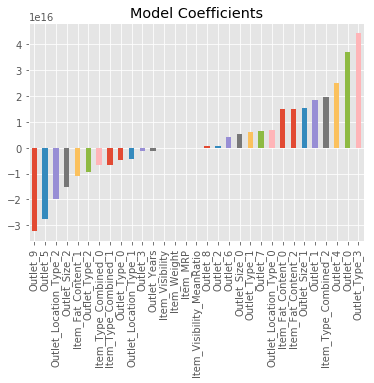

In [45]:
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')
plt.show()

## Result

![](https://i.imgur.com/HW52t5Z.png)

- better than baseline model
- coeff are large in magniture which signifies overfitting.
- lets try ridge regression model

# Ridge Regression Model

In [50]:
predictors = [x for x in train.columns if x not in [target]+IDcol]


alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'data/alg2.csv')


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
coef2 = pd.Series(alg2.coef_, predictors).sort_values()

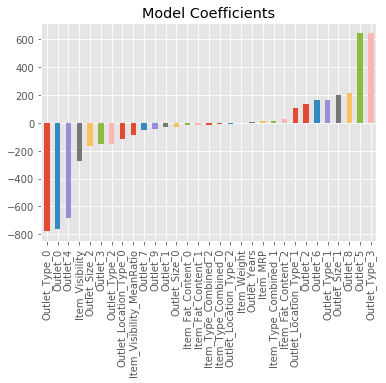

In [52]:
coef2.plot(kind='bar', title='Model Coefficients')

![](https://i.imgur.com/USbYKaC.png)

- regression coeff looks better 
- score is similar tho


# Decision Tree Model



Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


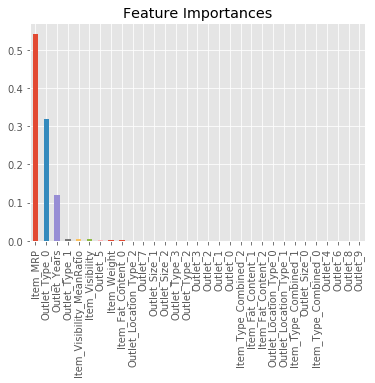

In [53]:
from sklearn.tree import DecisionTreeRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]


alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'data/alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


![](https://i.imgur.com/kAcm38t.png)

- RMSE is 1058
- mean cv error is 1091
- this tells us that model is slight overfitting
- redo
    - 4 vars
    - `max_depth` = 8
    - `min_samples_leaf` = 150


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


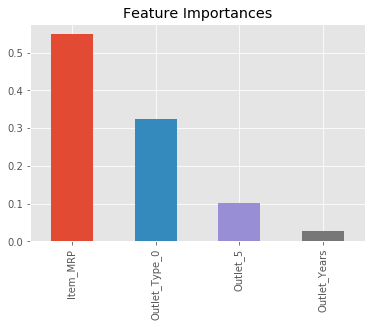

In [54]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']

alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

modelfit(alg4, train, test, predictors, target, IDcol, 'data/alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')


![](https://i.imgur.com/sAlMu7G.png)


# Random Forest Model



Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.41 | Min - 1021 | Max - 1161


/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


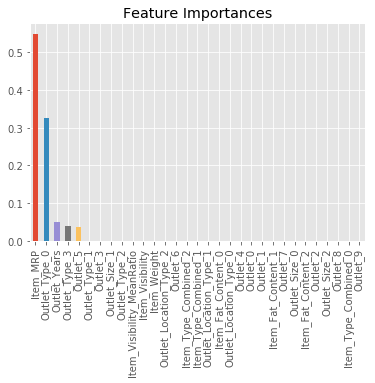

In [55]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]


alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)

modelfit(alg5, train, test, predictors, target, IDcol, 'data\alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


![](https://i.imgur.com/jIc0PKI.png)

- it migh tfeel that its a very small impovement, but as the model gets better, achieving even minute improvements become exponentially dificult
- try again with
    - `max_depth` = 6
    - 400 trees


Model Report
RMSE : 1068
CV Score : Mean - 1082 | Std - 43.63 | Min - 1019 | Max - 1160


/home/frank/miniconda3/envs/supervised/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


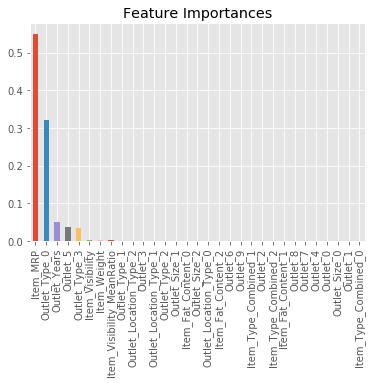

In [56]:
predictors = [x for x in train.columns if x not in [target]+IDcol]


alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)

modelfit(alg6, train, test, predictors, target, IDcol, 'data/alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')


![](https://i.imgur.com/NfLoWL2.png)
